## Task 1 - Vacation Search Results

Reading the Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_poland = pd.read_csv('poland.csv', skiprows=1)
df_usa = pd.read_csv('usa.csv', skiprows=1)
df_uk = pd.read_csv('uk.csv', skiprows=1)

Combining the DataFrames

In [ ]:
df_combined = pd.concat([
    df_poland.set_index('Miesiąc'),
    df_usa.set_index('Miesiąc'),
    df_uk.set_index('Miesiąc')
], axis=1)

Renaming the combined dataframe index and columns

In [ ]:
df_combined.index = pd.to_datetime(df_combined.index)
df_combined.index.rename('Month', inplace=True)

df_combined.rename(columns={
    df_combined.columns[0]: 'PL',
    df_combined.columns[1]: 'USA',
    df_combined.columns[2]: 'UK'
}, inplace=True)

In [ ]:
print(df_combined)

             PL  USA  UK
Month                   
2004-01-01    0  100  41
2004-02-01   86   87  37
2004-03-01    0   80  43
2004-04-01  100   78  40
2004-05-01   56   85  38
...         ...  ...  ..
2023-11-01   41   40  27
2023-12-01   57   53  48
2024-01-01   51   44  26
2024-02-01   62   42  27
2024-03-01   56   39  23

[243 rows x 3 columns]


Presenting the time series for all countries in one plot

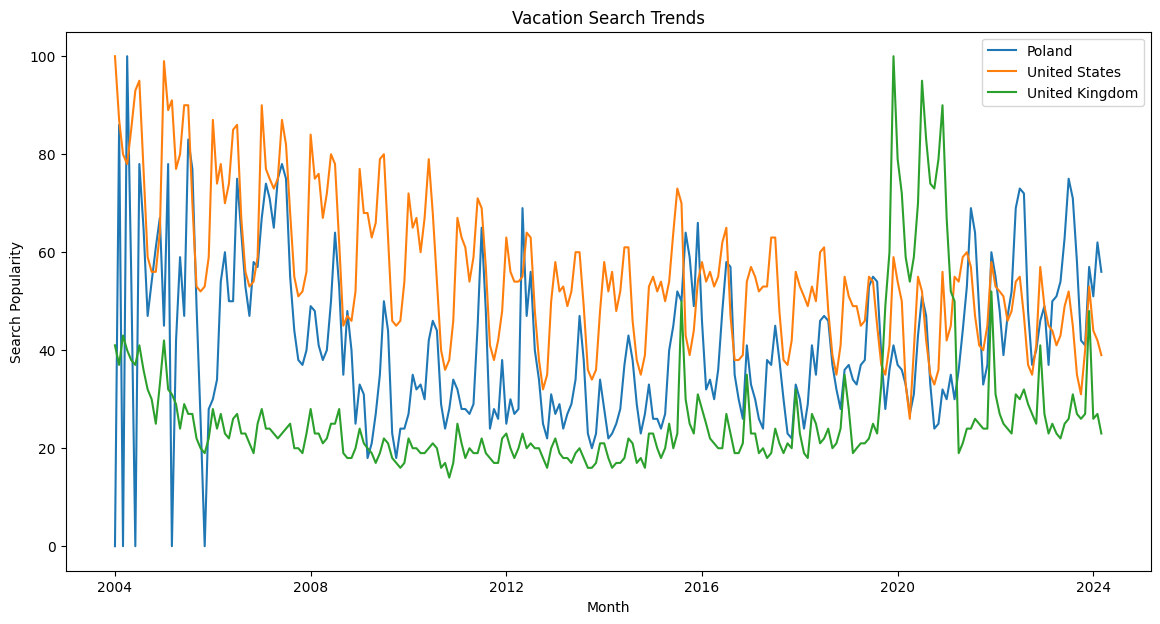

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df_combined.index, df_combined['PL'], label='Poland')
plt.plot(df_combined.index, df_combined['USA'], label='United States')
plt.plot(df_combined.index, df_combined['UK'], label='United Kingdom')
plt.legend()
plt.title('Vacation Search Trends')
plt.xlabel('Month')
plt.ylabel('Search Popularity')
plt.show()

Generating the descriptive statistics

In [ ]:
print(df_combined.describe())

               PL         USA          UK
count  243.000000  243.000000  243.000000
mean    41.325103   56.000000   26.995885
std     16.466259   14.814835   14.255780
min      0.000000   26.000000   14.000000
25%     29.000000   46.000000   20.000000
50%     38.000000   54.000000   23.000000
75%     50.500000   63.000000   27.000000
max    100.000000  100.000000  100.000000


Showing three histograms in one plot

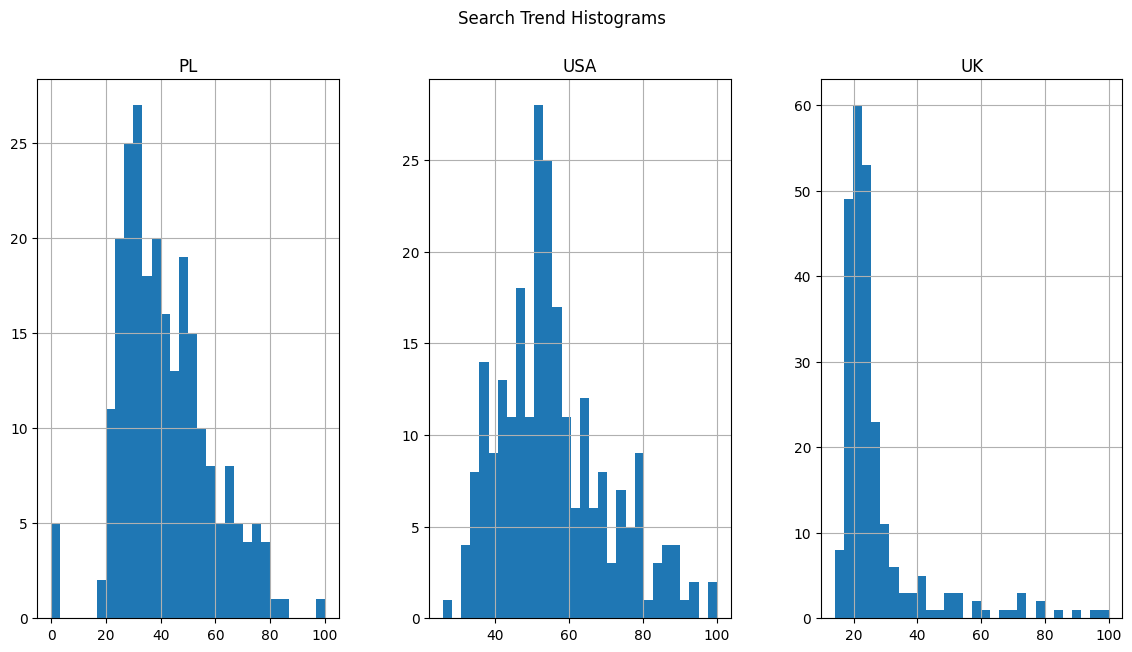

In [ ]:
df_combined.hist(bins=30, figsize=(14, 7), layout=(1, 3))
plt.suptitle('Search Trend Histograms')
plt.show()

In case the histograms need to be overlapped:

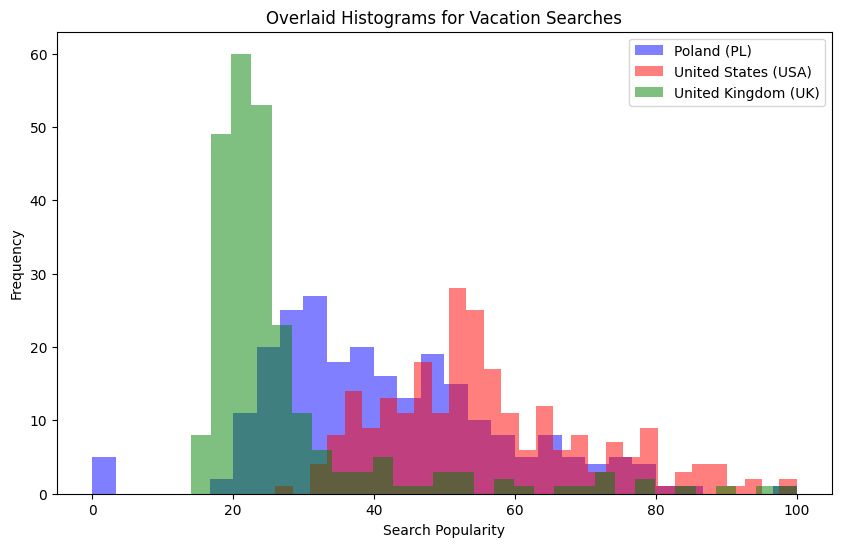

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting each histogram and adding some transparency
plt.hist(df_combined['PL'], bins=30, alpha=0.5, label='Poland (PL)', color='blue')
plt.hist(df_combined['USA'], bins=30, alpha=0.5, label='United States (USA)', color='red')
plt.hist(df_combined['UK'], bins=30, alpha=0.5, label='United Kingdom (UK)', color='green')

# Adding titles and labels
plt.title('Overlaid Histograms for Vacation Searches')
plt.xlabel('Search Popularity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()


Showing three kernel densities in one plot

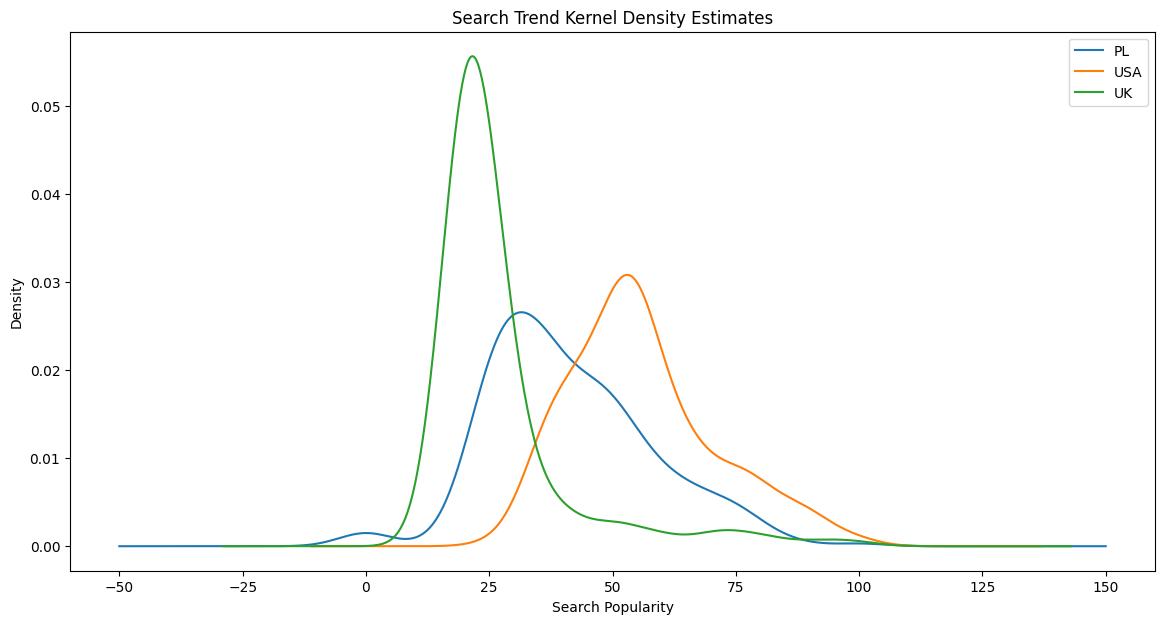

In [ ]:
df_combined.plot(kind='density', figsize=(14, 7))
plt.title('Search Trend Kernel Density Estimates')
plt.xlabel('Search Popularity')
plt.show()